# Análisis cinemático de mecanismos

w = symbols("\\omega")
r = symbols("r_{BA}")
thBA = symbols("\\theta_{BA}")
va = symbols("v_A")
vb = symbols("v_B")
tha = symbols("\\theta_{A}")
thb = symbols("\\theta_{B}")

VA = Matrix([va*cos(tha), va*sin(tha), 0])
VB = Matrix([vb*cos(thb), vb*sin(thb), 0])
W = Matrix([0,0,w])
RBA = Matrix([r*cos(thBA), r*sin(thBA), 0])

ecv = Eq(VB, VA + W.cross(RBA) )

solve(ecv, [vb, w])

## Utilizando la librería `cime`

La librería `cime` es un conjunto de funciones y clases cuyo objetivo es facilitar el análisis cinemático de mecanismos planos. 

Para instalar la librería debe ejecutar la siguiente instrucción en consola:

```
pip install git+https://github.com/iro-upgto/cime.git
```

Asegúrese que al momento de ejecutar estas instrucciones cuente con una conexión a internet.

### Importando la librería

Para importar las funciones y clases de esta librería basta con ejecutar la siguiente instrucción:

In [1]:
from cime import *


### La función `vexp` 

La función `vexp` de la librería `cime` tiene el objetivo de representar un vector en forma rectangular a partir de su forma compleja exponencial. Por ejemplo:

$$
K e^{j\theta} \qquad \rightarrow \qquad \begin{bmatrix} K \cos\theta \\ K \sin\theta \end{bmatrix}
$$

O bien:

$$
j K e^{j\theta} \qquad \rightarrow \qquad \begin{bmatrix} - K \sin\theta \\ K \cos\theta \end{bmatrix}
$$

Vamos a definir primeramente algunas variables simbólicas:

In [2]:
K = symbols("K")
th = symbols("\\theta")

La función `vexp` puede aceptar tres argumentos, podemos solicitar la ayuda al respecto:

In [3]:
help(vexp)

Help on function vexp in module cime.core:

vexp(r, theta, j=False)
    Parameters
    ----------
    r : int, float, symbol
        Vector magnitude
    theta : int, float, symbol
        Vector orientation
    j : bool
        ¿Is multiplied by "j"?
    
    Returns
    -------
    R : :class:`sympy.matrices.dense.MutableDenseMatrix`
        Vector in rectangular coordinates



El primer argumento corresponde a la magnitud del vector, el segundo a la orientación (ángulo) del vector y el tercero corresponde a un argumento booleano que indica si el vector está multiplicado por la unidad imaginaria `j`, por default se asume que no.

Veamos el siguiente ejemplo:

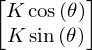

In [4]:
vexp(K, th)

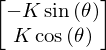

In [5]:
vexp(K, th, "j")

Naturalmente, no sólo funciona para valores simbólicos:

In [6]:
vexp(5, pi/2)

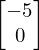

In [7]:
vexp(5, pi/2, "j")

### Resolviendo problemas de análisis cinemático utilizando `cime`

En la figura se muestra un mecanismo de manivela-biela corredera. Se sabe que el ángulo $\phi = 45°$ y que la manivela $OA$ está rotando a una velocidad angular $\omega_{OA} = 12$ rad/s, con esa información debemos determinar la velocidad angular de la biela $AB$ y la velocidad del bloque en $B$. Se conoce que $\overline{OA}=100$ mm y $\overline{AB}=300$ mm.

<img src="img/acm/slider_crank_01.svg">

Si planteamos el lazo vectorial como se muestra en la figura podemos establecer la siguiente ecuación de posición:

$$ r_2 e^{j\theta_2} + r_3 e^{j\theta_3} - r_1 e^{j\theta_1} = 0 $$

Utilizando `cime` para establecer dicha ecuación, previamente definiendo los valores conocidos:

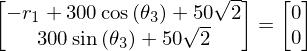

In [28]:
r2 = 100
r3 = 300
t1 = 0 
t2 = rad(45)
ecpos = Eq( vexp(r2, t2) + vexp(r3, t3) - vexp(r1, t1), vexp(0,0))
ecpos

Resolviendo para los valores desconocidos, se tiene:

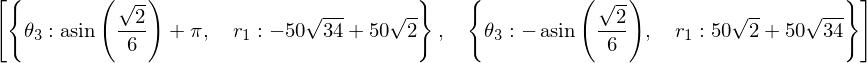

In [30]:
xpos = solve(ecpos)
xpos

Observe que Python nos devuelve dos soluciones, ¿cuál debemos tomar? ¡La que corresponda con la posición actual del mecanismo!

Por ejemplo, si tomamos la primera solución:

In [35]:
deg(xpos[0][t3]).evalf(), (xpos[0][r1]).evalf()

Se observa que los valores calculados no corresponden con lo esperable. Veamos ahora con la segunda solución:

In [36]:
deg(xpos[1][t3]).evalf(), (xpos[1][r1]).evalf()

Note que esta solución sí corresponde con lo que esperaríamos. Reescribimos la variable `xpos` para únicamente quedarnos con la segunda solución:

In [37]:
xpos = xpos[1]

Para el análisis de velocidad, derivando la ecuación de posición se tiene:


## Ejemplos resueltos (método del movimiento relativo)

Para todos los ejemplos resueltos, asumiremos que hemos importado, previamente, la librería SymPy, de la siguiente manera:

In [8]:
from sympy import *
from sympy.matrices import Matrix

Y que hemos colocado la instrucción `init_printing` para *renderizar* las expresiones de SymPy:

In [9]:
init_printing()

<hr style="border-top: 3px solid #070707;">

**Ejemplo 1**. En la figura se muestra una placa rectangular de (300x180) mm, la cual está rotando a una velocidad angular constante de 65 rad/s en el sentido de las manecillas del reloj. Calcule la velocidad y aceleración de los puntos $P$, $Q$ y $M$, para la posición esquematizada.

<img src="img/acm/rectangular_plate.svg">

*Solución*

Comenzamos definiendo el vector de velocidad angular, el ángulo de 30° y las dimensiones de la placa:

In [10]:
w = Matrix([0,0,-65]) # Vector de velocidad angular
th = rad(30).evalf() # Ángulo en radianes
b = 300 # Base de la placa
h = 180 # Alto de la placa

Para la velocidad del punto $Q$ sabemos que:

$$ \vec{v}_Q = \vec{\omega} \times \vec{r}_{Q/O}$$

Entonces:

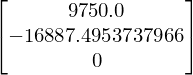

In [11]:
rQO = Matrix([b*cos(th), b*sin(th), 0]) # Vector r_Q/O
vQ = w.cross(rQO) # Velocidad del punto del punto Q
vQ 

De manera similar se puede proceder para las velocidades de los puntos $M$ y $P$.

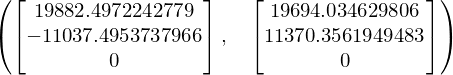

In [12]:
beta = atan(h/b)
tQ = th + beta # ángulo formado por el vector r_M/O con respecto a la horizontal
tP = th + pi/2 # ángulo formado por el vector r_P/O con respecto a la horizontal
r = sqrt(h**2 + b**2) # diagonal del rectángulo
rMO = Matrix([r*cos(tQ), r*sin(tQ), 0])
rPO = Matrix([r*cos(tP), r*sin(tP), 0])

vM = w.cross(rMO) # velocidad de M
vP = w.cross(rPO) # velocidad de P

vM.evalf(), vP.evalf()

Para las aceleraciones, dado que $\omega$ es constante, entonces, $\alpha=0$.

La aceleración del punto $Q$ se puede calcular como:

$$ \vec{a}_Q = \vec{\alpha} \times \vec{r}_{Q/O} + \vec{\omega} \times \left( \vec{\omega} \times \vec{r}_{Q/O} \right)  $$

Entonces:

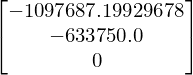

In [13]:
alpha = Matrix([0,0,0]) # vector de velocidad angular

aQ = alpha.cross(rQO) + w.cross(w.cross(rQO)) # Aceleración de Q
aQ

De manera similar para las aceleraciones de $P$ y $M$:

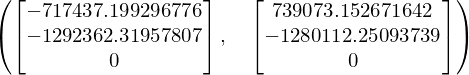

In [14]:
aM = alpha.cross(rMO) + w.cross(w.cross(rMO))
aP = alpha.cross(rPO) + w.cross(w.cross(rPO))

aM.evalf(), aP.evalf()

<hr style="border-top: 3px solid #070707;">

**Ejemplo 2.** El bloque ubicado en $A$ se desplaza a 100 mm/s hacia arriba en el instante en que $\varphi = 60°$. Calcule la velocidad angular de la barra $AB$ y la velocidad del bloque en $B$. Considere que la barra $AB$ mide 500 mm.

<img src="img/acm/double_slider.svg">

*Solución*

In [15]:
L = 500 # longitud de la barra AB (mm)
phi = rad(60).evalf()
VA = Matrix([0,100,0]) # vector de velocidad de A
vB = symbols("v_B") # 
VB = Matrix([vB,0,0]) # vector de velocidad de B
wAB = symbols("\\omega_{AB}")
WAB = Matrix([0,0,wAB]) # vector de velocidad angular AB
RBA = Matrix([L*cos(phi), L*sin(phi), 0])

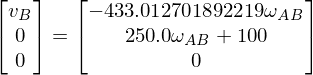

In [16]:
ecvr = Eq(VB, VA + WAB.cross(RBA)) # ecuación de velocidad relativa
ecvr

In [17]:
solve(ecvr) # resolviendo la ecuación de velocidad relativa